##🎯 What You’ll Learn in This Video

✅ Calculate NDMI using Sentinel-2 and Landsat8 with eemont

✅ Visualize NDMI in interactive maps with geemap

###What is NDMI (Normalized Difference Moisture Index) ?
<div dir="rtl">

- هو مؤشر قياس محتوى الرطوبة أو الماء في الغطاء النباتي (الأوراق والأنسجة النباتية) وكذلك رطوبة التربة السطحية

- يقيس الإجهاد المائي (Water Stress) للنبات، وهو مؤشر ممتاز للكشف المبكر عن الجفاف أو الغدق (زيادة الماء)

- يعتمد على الانعكاس في نطاقين رئيسيين: القريب من الأشعة تحت الحمراء (
NIR
) والأشعة تحت الحمراء قصيرة الموجة (
SWIR
).

**أساس عمل مؤشر
NDMI**

 (العلاقة الطيفية)

- يعتمد
NDMI
 على التفاعل المميز للماء الموجود داخل أنسجة النبات مع الإشعاع في النطاقين المستخدمين:

- النطاق القريب من الأشعة تحت الحمراء (
NIR): تتأثر انعكاسية هذا النطاق بشكل رئيسي بـالبنية الخلوية للنبات وكتلته الحيوية (كما في
NDVI
).

- نطاق الأشعة تحت الحمراء قصيرة الموجة (
SWIR
): هذا النطاق حساس للغاية لـمحتوى الماء داخل الأنسجة النباتية.

كلما زاد محتوى الماء في النبات، زاد امتصاصه للطاقة في نطاق
SWIR
، وبالتالي قلت انعكاسيته.

كلما قل محتوى الماء (إجهاد مائي/جفاف)، قل امتصاصه للطاقة في نطاق
SWIR
، وبالتالي زادت انعكاسيته.

**المعادلة**

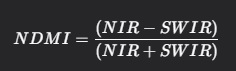

مدى القيم

تتراوح قيم المؤشر بين
−1.0
 و
+1.0
. كلما كانت القيمة أقرب إلى
+1
، زاد محتوى الماء في النبات، وكلما كانت القيمة أقرب إلى
−1
، قلت الرطوبة وزاد الجفاف أو كان السطح جافاً غير نباتي.
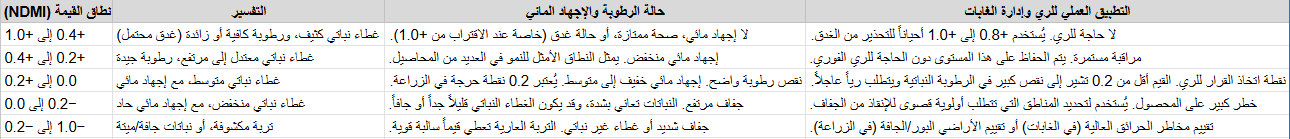
</div>

In [ ]:
!pip install eemont

In [ ]:
import ee
import geemap
import eemont

In [ ]:
# Authenticate and initialize Earth Engine
ee.Authenticate()

ee.Initialize(project = 'ee-nouribrahim25')

In [ ]:
coors = [[30.305788, 30.178518],
    [30.305788, 30.237858],
    [30.419943, 30.237858],
    [30.419943, 30.178518],
    [30.305788, 30.178518]]

In [ ]:
aoi = ee.Geometry.Polygon(coors)
aoi

In [ ]:
#Date Range
start_date = '2025-01-01'
end_date   = '2025-02-01'

In [ ]:
# Sentinel-2 with eemont
sen2 = (ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
      .filterBounds(aoi)
      .filterDate(start_date , end_date)
      .maskClouds()                             # Cloud/shadow masking
      .scaleAndOffset()                         # Apply scale/offset
      .spectralIndices("NDMI")                  # Calculate the index
      .mean()
      .clip(aoi)
)

In [ ]:
# Landsat 8 with eemont
land8 = (
    ee.ImageCollection('LANDSAT/LC08/C02/T1_L2')
    .filterDate(start_date, end_date)
    .filterBounds(aoi)
    .maskClouds()
    .scaleAndOffset()
    .spectralIndices('NDMI')
    .mean()
    .clip(aoi)
)


In [ ]:
# visulization parameters
vis_ndmi = {'min': 0, 'max': 0.8,
          'palette': ['lightblue', 'deepskyblue', 'blue', 'darkblue']
            }


In [ ]:
Map = geemap.Map(width = 800)
Map.centerObject(aoi, 10)

In [ ]:
# Sentinel-2 layer
Map.addLayer(sen2.select('NDMI'), vis_ndmi, 'NDMI Sentinel-2')
# Landsat 8 layer
Map.addLayer(land8.select('NDMI'), vis_ndmi, 'NDMI Landsat 8')

# Add continuous colorbar legend
Map.add_colorbar(
    vis_params=vis_ndmi,
    label="Low moisture | High moisture",
    orientation='horizontal')
Map